In [1]:
# Setup & paths (robust to where the notebook runs)
import os, sys, math
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Find repo root by walking up until .git exists (fallback: 3 levels up)
def find_repo_root(start: Path) -> Path:
    for p in [start, *start.parents]:
        if (p / ".git").exists():
            return p
    return start.parents[3] if len(start.parents) >= 3 else start

CWD  = Path.cwd()
ROOT = find_repo_root(CWD)

RAW_DIR  = ROOT / "homework/stage08_eda/data/raw"
PROC_DIR = ROOT / "homework/stage08_eda/data/processed"
RAW_DIR.mkdir(parents=True, exist_ok=True)
PROC_DIR.mkdir(parents=True, exist_ok=True)

# Choose your dataset (edit this filename if needed)
DATA_PATH = RAW_DIR / "your_dataset.csv"   # <-- change if you have a different file

print("CWD:", CWD)
print("ROOT:", ROOT)
print("RAW_DIR:", RAW_DIR)
print("PROC_DIR:", PROC_DIR)
print("DATA_PATH:", DATA_PATH)
np.random.seed(42)


CWD: /Users/chen/bootcamp_tingchen_chen/homework/stage08_eda/notebooks
ROOT: /Users/chen/bootcamp_tingchen_chen
RAW_DIR: /Users/chen/bootcamp_tingchen_chen/homework/stage08_eda/data/raw
PROC_DIR: /Users/chen/bootcamp_tingchen_chen/homework/stage08_eda/data/processed
DATA_PATH: /Users/chen/bootcamp_tingchen_chen/homework/stage08_eda/data/raw/your_dataset.csv


In [2]:
# Load your dataset or generate a synthetic fallback that mimics a simple schema
if DATA_PATH.exists():
    df = pd.read_csv(DATA_PATH)
else:
    # Synthetic fallback
    n = 500
    df = pd.DataFrame({
        "date": pd.date_range("2024-01-01", periods=n, freq="D"),
        "category": np.random.choice(["A","B","C"], size=n, p=[0.5,0.3,0.2]),
        "x1": np.random.normal(50, 10, n),
        "x2": np.random.exponential(1.0, n) * 20,
        "y":  3.5 * np.random.normal(50, 10, n) + 2.0 * np.random.normal(0, 1, n)
    })
df.head()


,date,category,x1,x2,y
0,2024-01-01,A,53.417560,6.212963,180.863115
1,2024-01-02,C,68.761708,42.178229,162.796082
2,2024-01-03,B,59.504238,31.933003,176.861297
3,2024-01-04,B,44.230963,21.485331,169.497345
4,2024-01-05,A,41.015853,38.020114,196.774363


In [3]:
print("Shape:", df.shape)
display(df.head(3))

# info() prints to stdout; wrap to show clearly in notebooks
print("\nDataFrame info():")
df.info()

# Numeric / categorical columns
num_cols = df.select_dtypes(include=["number", "float", "int"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
date_cols = df.select_dtypes(include=["datetime64[ns]"]).columns.tolist()

print("\nNumeric columns:", num_cols)
print("Categorical columns:", cat_cols)
print("Datetime columns:", date_cols)

# Missing value counts
missing = df.isna().sum().sort_values(ascending=False)
display(missing.to_frame("missing_count").T if missing.size else pd.DataFrame({"missing_count": []}))


Shape: (500, 5)


,date,category,x1,x2,y
0,2024-01-01,A,53.417560,6.212963,180.863115
1,2024-01-02,C,68.761708,42.178229,162.796082
2,2024-01-03,B,59.504238,31.933003,176.861297



DataFrame info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      500 non-null    datetime64[ns]
 1   category  500 non-null    object        
 2   x1        500 non-null    float64       
 3   x2        500 non-null    float64       
 4   y         500 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 19.7+ KB

Numeric columns: ['x1', 'x2', 'y']
Categorical columns: ['category']
Datetime columns: ['date']


,date,category,x1,x2,y
missing_count,0,0,0,0,0


In [4]:
# Numeric summary
if num_cols:
    display(df[num_cols].describe().T)

# Categorical summary: cardinality and top values
if cat_cols:
    card = df[cat_cols].nunique().sort_values(ascending=False)
    display(card.to_frame("n_unique").T)
    for c in cat_cols:
        display(df[c].value_counts().head(10).to_frame(name=f"{c}_top10"))


,count,mean,std,min,25%,50%,75%,max
x1,500.0,50.076199,10.070622,23.031134,43.490590,49.672760,56.613263,80.788808
x2,500.0,20.506894,20.608277,0.099044,5.571097,14.921823,26.904591,148.834458
y,500.0,177.829618,34.839965,70.932671,155.230776,176.790765,201.197831,285.732338


,category
n_unique,3


,category_top10
category,
A,241
B,153
C,106


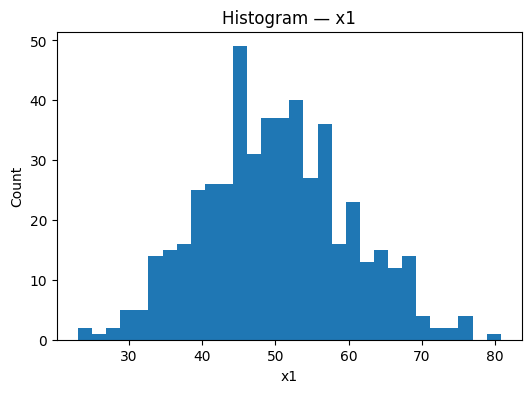

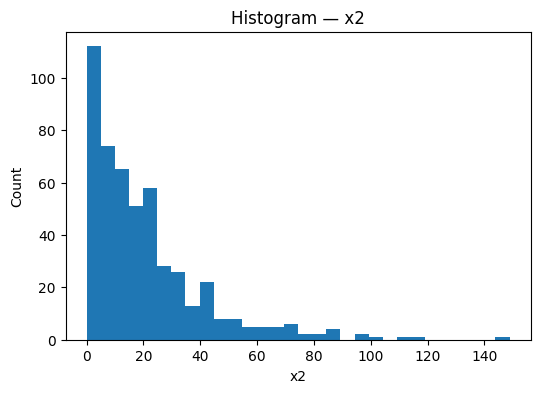

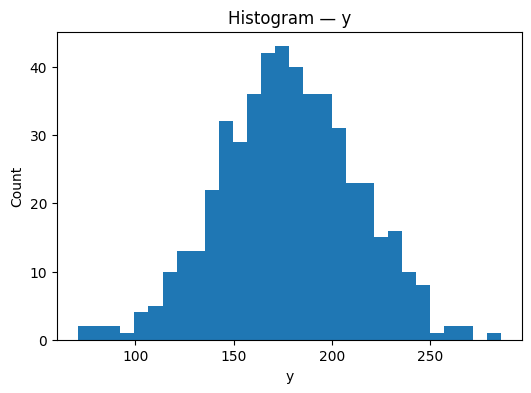

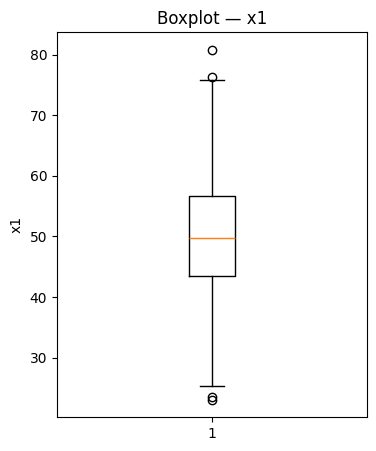

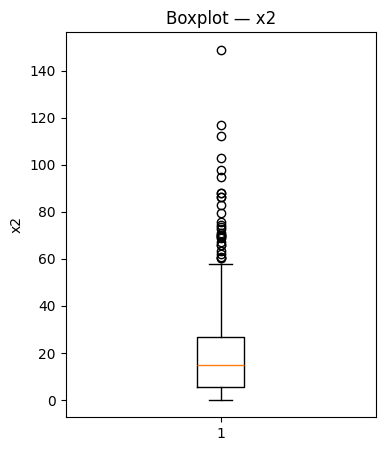

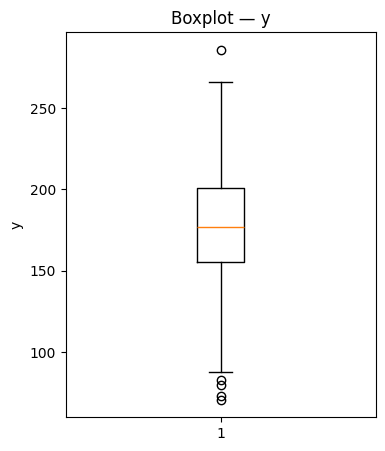

In [5]:
# Histograms for up to 3 numeric columns
for c in num_cols[:3]:
    plt.figure(figsize=(6,4))
    df[c].plot(kind="hist", bins=30)
    plt.title(f"Histogram — {c}")
    plt.xlabel(c); plt.ylabel("Count")
    plt.show()

# Boxplots for up to 3 numeric columns
for c in num_cols[:3]:
    plt.figure(figsize=(4,5))
    plt.boxplot(df[c].dropna())
    plt.title(f"Boxplot — {c}")
    plt.ylabel(c)
    plt.show()


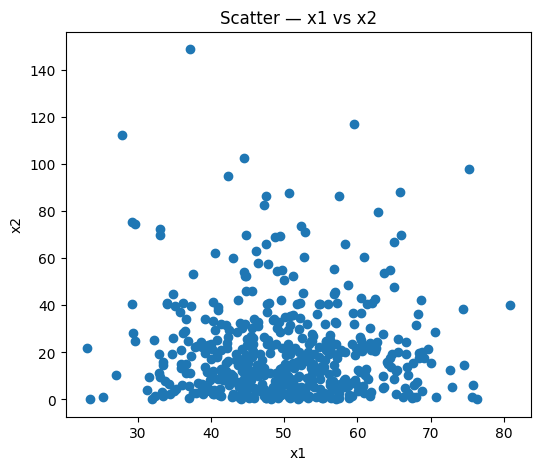

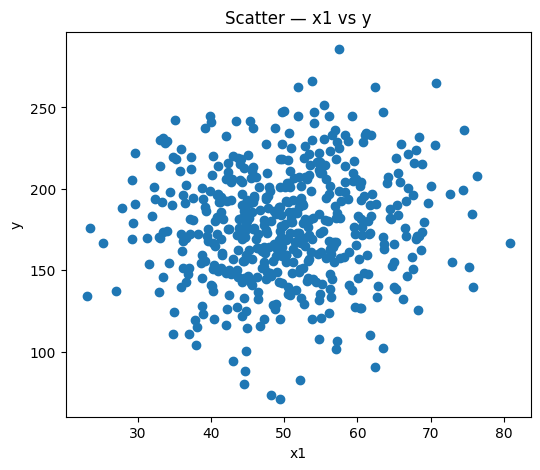

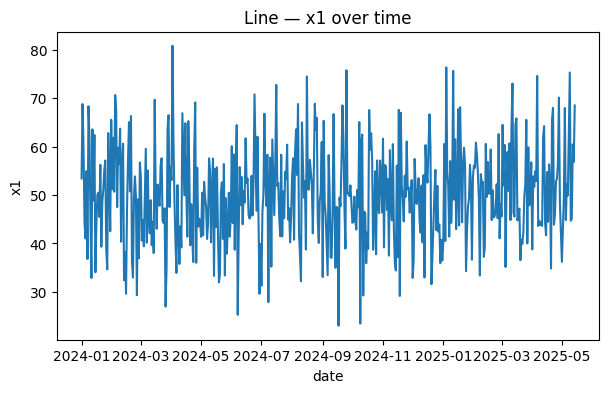

In [6]:
# Scatter for two numeric relationships (choose first pairs)
pairs = []
if len(num_cols) >= 2:
    pairs.append((num_cols[0], num_cols[1]))
if len(num_cols) >= 3:
    pairs.append((num_cols[0], num_cols[2]))

for x, y in pairs[:2]:
    plt.figure(figsize=(6,5))
    plt.scatter(df[x], df[y])
    plt.title(f"Scatter — {x} vs {y}")
    plt.xlabel(x); plt.ylabel(y)
    plt.show()

# If there is a datetime column + a numeric target, do a simple line plot
if date_cols and num_cols:
    tcol = date_cols[0]
    ycol = num_cols[0]
    ser = df[[tcol, ycol]].dropna().sort_values(tcol)
    plt.figure(figsize=(7,4))
    plt.plot(ser[tcol], ser[ycol])
    plt.title(f"Line — {ycol} over time")
    plt.xlabel(tcol); plt.ylabel(ycol)
    plt.show()


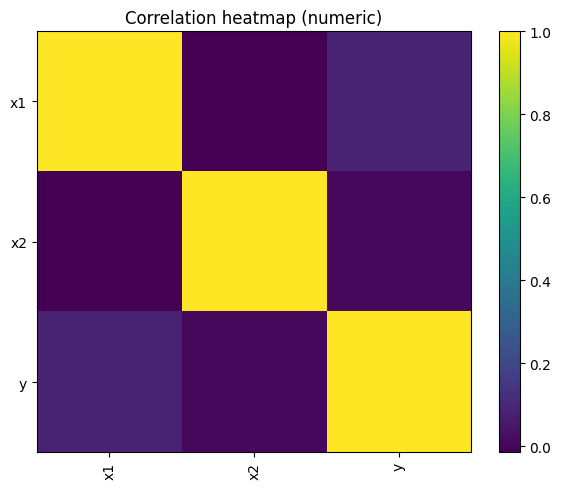

,x1,x2,y
x1,1.000000,-0.014411,0.083080
x2,-0.014411,1.000000,0.006929
y,0.083080,0.006929,1.000000


In [7]:
if len(num_cols) >= 2:
    corr = df[num_cols].corr(numeric_only=True)
    plt.figure(figsize=(6,5))
    plt.imshow(corr, aspect="auto")
    plt.colorbar()
    plt.xticks(range(len(num_cols)), num_cols, rotation=90)
    plt.yticks(range(len(num_cols)), num_cols)
    plt.title("Correlation heatmap (numeric)")
    plt.tight_layout()
    plt.show()
    display(corr)


## Findings (per the visuals)
- **Distributions:** Note skewness, heavy tails, or multimodality (e.g., `x2` is right-skewed).
- **Outliers:** Identify any extreme values visible in boxplots/histograms.
- **Relationships:** Describe trends or clusters visible in scatter/line plots.
- **Missingness:** Summarize columns with non-trivial missing counts.

## Assumptions & Risks
- Assumed stationarity or independence where applicable; violations may bias summary stats.
- If outliers are influential, subsequent modeling may require robust methods or trimming/winsorizing.
- Categorical imbalance may affect generalization.

## Implications for Next Step
- **Cleaning:** Plan to impute specific columns; handle outliers (IQR/winsorize) if needed.
- **Feature Engineering:** Consider log/box-cox for skewed features; one-hot encode key categories; time-based features from `date`.


In [8]:
# Save a lightweight profiled snapshot (optional)
profile_path = PROC_DIR / "eda_profile_columns.csv"
df[[*num_cols, *cat_cols]].head(50).to_csv(profile_path, index=False)
profile_path


PosixPath('/Users/chen/bootcamp_tingchen_chen/homework/stage08_eda/data/processed/eda_profile_columns.csv')